# Exercici de Xarxes Neuronals

### EXERCICI 1: Lectura i preparació del dataset (Jugadors de la NBA 1996-2021)
Per a fer l'exercici de clustering hem escollit el dataset de jugadors de la NBA. Com que la variable objectiu és lliure, hem decicit agrupar els jugadors per tipus segons el seu estil de joc. Les dades a tenir en compte en l'anàlisi s'escolliran un cop netejat el dataset i havent trobat les correlacions entre elles. 

#### 1.1 Importació del dataset

Primer de tot, en el fitxer .csv proporcionat, com que no hi ha nom de la columna al primer camp (el que indica el número de fila), se l'hi ha inserit manualment el nom de 'id'. Encara que és una dada que no es farà servir, hem preferit importar primer tot el dataset correctament i llavors decidir treure aquelles columnes que no siguin necessàries abans de fer l'anàlisi.

Així doncs, s'ha importat el dataset, tenint en compte que alguns camps, com el de 'college', tenen la informació entre cometes. 
Per tal que les dades d'aquells camps no quedin tallades, s'han inclòs les opcions de quotechar i on_bad_lines a l'hora de llegir el fitxer amb las llibreria pandas. Per tenir una vista prèvia de la informació s'ha fet un head(), per veure les 5 primeres línies, i un info(), per veure el tipus de cada camp i els valors nuls.

In [259]:
#Processament de dades
import pandas as pd
#Gràfiques
import matplotlib.pyplot as plt
import seaborn as sns
#Models
import sklearn as skl

import numpy as np

#Importació del dataset (tenint en compte camps que tenen cometes dobles com un sol camp)
dataset = pd.read_csv('all_seasons.csv', quotechar='"', on_bad_lines='skip')

#Informació sobre el dataset importat
display(dataset.head())
print(dataset.info())


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10985 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

#### 1.2 Modificació del tipus de dades del dataset
S'ha pogut comprovar amb info() que el dataset conté valors nuls només en la columna de 'college'. Per tal de solucionar-ho, en comptes de deixar aquests valors buits, s'han substituït per 'Unknown'. Encara que segurament la variable 'college' no serà molt útil en l'estudi del perfil de jugador, ens assegurem de tenir tot el dataset sencer en cas que s'hagin de fer altres operacions o exercicis.

D'altra banda, també s'ha passat a tipus 'int' aquells camps que són nombres enters (edat, gp...). 

Així doncs, només queda per modificar els valors categòrics abans de començar amb l'anàlisi de les dades.

In [260]:
#Passar a int valors enters
dataset['age'] = dataset['age'].astype(int)
dataset['gp'] = dataset['gp'].astype(int)

#Substituir aquells que son buits
dataset['college'] = dataset['college'].fillna('Unknown')

display(dataset.head())
print(dataset.info())


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  int64  
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            12844 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

#### 1.3 Tractament dels valors categòrics
Per dedicir com utilitzar les dades categòriques, principalment aquelles que no són numèriques, primer s'han decidit treure directament del dataset aquelles dades que no són importants. Així doncs, no s'han tingut en compte les columnes de id ni nom del jugador. Aquestes dades no aporten informació molt rellevant i així també s'evita feer un One-Hot-Encoding on el resultat siguin milers de columnes, una per cada nom.

A més a més, com que ens hem volgut centrar principalment en estudiar les característiques que poden influir en **l'estil de joc** individual del jugador (tenint en compte només aquelles dades que poden influir en el rendiment del jugador) hem decidit treure: **college, team_abbreviation i country**. Aquestes variables són molt disperses, i tenen a veure més amb l'entorn del jugador que no pas el perfil tècnic.

Així doncs, les dades que s'han dedicit mantenir són: **draft_year, draft_round, draft_number i season**. Aquestes variables en poden ajudar a veure l'evolució esportiva dels jugadors durant les diverses temporades que han jugat en la lliga. Tot i que són dades numèriques (excepte per season, que és una cadena de caràcters), però apareixen de forma repetida, hem decidit categoritzar-ho mitjançant One-Hot-Encoding.

In [261]:
# Aplicar One-Hot Encoding a les columnes categòriques

print(dataset['draft_year'].unique())
print(dataset['draft_round'].unique())
print(dataset['draft_number'].unique())


dataset_parsed = dataset.drop(columns=['id', 'player_name', 'college', 'team_abbreviation', 'country'])
df_encoded = pd.get_dummies(dataset_parsed, columns=['draft_year', 'draft_round', 'draft_number', 'season'], drop_first=True)
print(df_encoded.head())

['1996' '1994' '1993' '1989' '1995' '1985' '1988' '1991' '1986' '1990'
 '1984' '1987' '1982' '1992' 'Undrafted' '1983' '1981' '1978' '1979'
 '1980' '1976' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '1963' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']
['2' '1' 'Undrafted' '3' '4' '8' '6' '7' '0']
['42' '34' '12' '7' '22' '47' '30' '4' '1' '3' '11' '33' '26' '35' '17'
 '25' '28' '49' '23' '2' '15' '27' 'Undrafted' '37' '38' '13' '18' '9'
 '21' '43' '14' '10' '6' '57' '52' '32' '39' '46' '29' '16' '45' '20' '48'
 '5' '79' '41' '51' '36' '75' '56' '8' '24' '165' '40' '19' '58' '44'
 '139' '54' '127' '124' '50' '160' '63' '31' '69' '53' '55' '120' '87'
 '66' '82' '60' '59' '78' '0']
   age  player_height  player_weight  gp   pts  reb  ast  net_rating  \
0   22         193.04      94.800728  64   3.9  1.5  2.4         0.3   
1   28         190.50      86.182480   4   3.8  1.3  0.3         8.9   
2

#### 1.4 Dades finals
Així doncs, per tal d'analitzar l'estil de joc i rendiment individual del jugador, s'han tingut en compte les següents dades: 
- **Edat, Alçada i Pes**: que són les característiques físiques del jugador.
- **Punts, Rebots, Assistències, Valoració, Partits Jugats, % de rebots ofensius, % de rebots defensius, % de participació en jugades d'atac i % de assistències**: que indiquen el rendiment del jugador a la pista.
- **Any del Draft, Ronda i Número de Draft, Temporada**: que marquen la evolució del jugador al llarg de la seva carrera. 



#### 1.5 Matriu de correlació
Per analitzar la correlació entre les dades numèriques s'ha graficat una matriu de correlació.

De les correlacions positives, les més altes són **Alçada-Pes** i **Assistències-% d'Assistències**. Aquestes relacions són coherents, ja que els jugadors més alts solen pesar més, i el percentatge d'assistències està relacionat amb les assistències.

De les correlacions positives que poden ser útils, hi ha: 
**Punts-% de jugades d'atac**: com més ataca un jugador més punts pot fer; **Punts-Assistències**: com més punts fa, més assistències pot fer... **l'Alçada/Pes amb Rebots** (tant ofensius com defensius): com més alt més pilotes pot agafar...

De les correlacions negatives: **Alçada/Pes - % d'Assistències**: ja que els jugadors alts tendeixen a finalitzar jugades, mentre que els més baixos són els que reparteixen el joc. 

De variables amb correlacions nul·les hi ha l'edat i la valoració, ja que aquestes semblen ser independents de l'estil de joc individual del jugador.

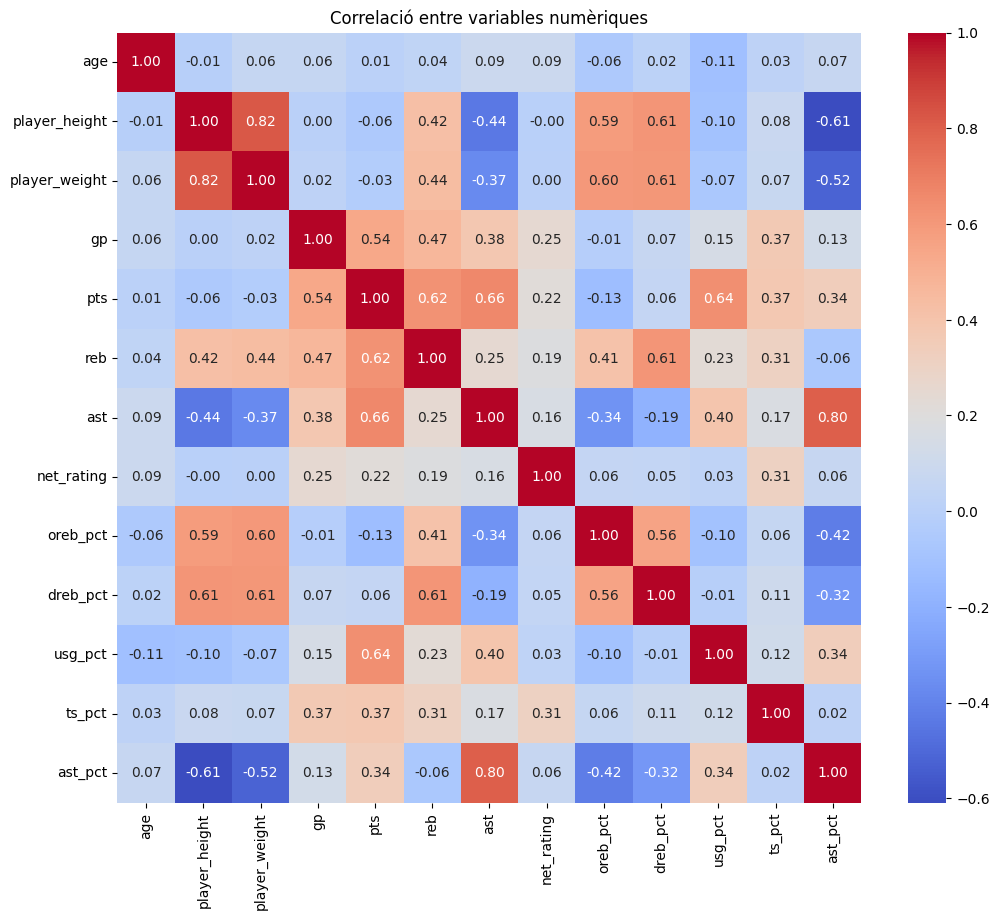

In [262]:
numerical_features = dataset_parsed.select_dtypes(include=['float64', 'int64'])
correlation = numerical_features.corr()

# Heatmap ordenat
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlació entre variables numèriques")
plt.show()

### EXERCICI 2: Selecció i Justificació de les dades abans del clustering


### EXERCICI 3: Clusterització per K-MEANS


#### 3.1 Trobar número òptim de clústers
Per trobar quin és el millor número de veïns s'han realitzat 2 mètodes d'anàlisi: el mètode del colze i el mètode de la silueta. 

##### Mètode del colze
Si es genera el K-means de forma iterativa, cada cop amb una k diferent, i situem la inèrcia resultant en un gràfic, es pot veure com s'arriba a formar un colze:

In [ ]:
def player_classifier(row):
    # Playmaker: assistències molt altes i alt ús
    if row['ast'] >= 4.5 and row['usg_pct'] >= 0.18 and row['pts'] < 20:
        return 0  # Playmaker
    # Rebounder: molts rebots, poques assistències, ús moderat
    elif row['reb'] >= 6 and row['ast'] < 3 and 0.13 <= row['usg_pct'] <= 0.23:
        return 1  # Rebounder
    # Scorer: molts punts i alt ús
    elif row['pts'] >= 16 and row['usg_pct'] >= 0.22:
        return 2  # Scorer
    else:
        return 3  # Role Player

df_encoded['player_type'] = df_encoded.apply(player_classifier, axis=1)


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset, random_split  

#Selecció de les dades
 


# x_tensor = torch.tensor(X_scaled, dtype=torch.float32)
# y_tensor = torch.tensor(Y, dtype=torch.long)

# dataset = TensorDataset(x_tensor, y_tensor)


# train_dataset, test_dataset = random_split(dataset, [0.8, 0.2], generator=torch.Generator().manual_seed(42))
X_np = X_scaled
y_np = Y.to_numpy()

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_np  # This preserves class distribution
)

# Then convert to tensors
train_dataset = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.long)
)

test_dataset = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.long)
)
input_size = X_train.shape[1]
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


#### 3.2 Creació del Model


In [264]:
class MLPBasic(nn.Module):
    def __init__(self, inputsize):
        super(MLPBasic, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(inputsize, 32),
            nn.ReLU(),
            nn.Linear(32, 4),                        
        )

    def forward(self, x):
        return self.model(x)

class MLPDeep(nn.Module):
    def __init__(self, inputsize):
        super(MLPDeep, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(inputsize, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 4),
        )

    def forward(self, x):
        return self.model(x)
    
def entrenar_model(model, train_loader, test_loader, epochs=20):
    criteri = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

    for epoch in range(epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criteri(output, batch_y.long())
            loss.backward()
            optimizer.step()

        scheduler.step()


AVALUACIÓ

🔹 Model BÀSIC


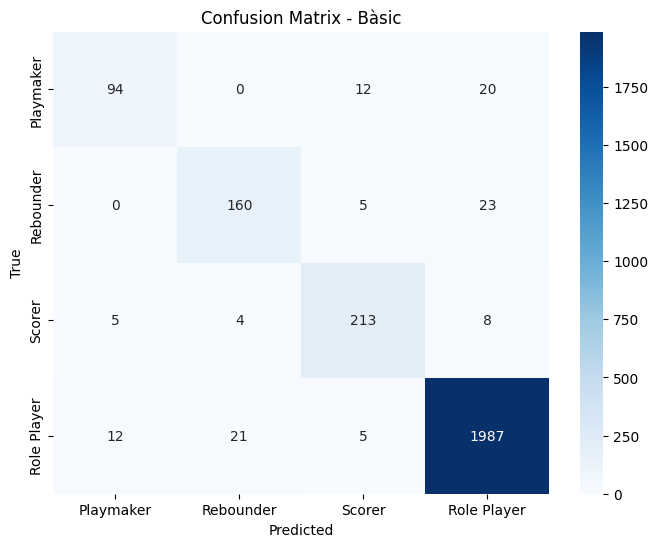

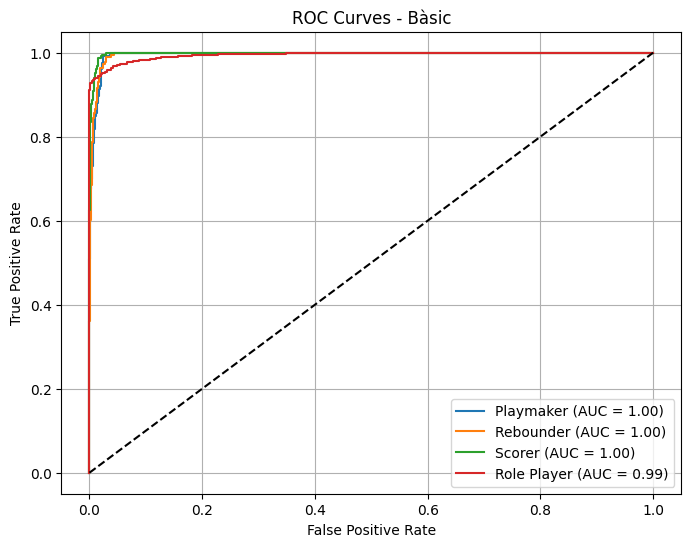

🔹 Model PROFUND


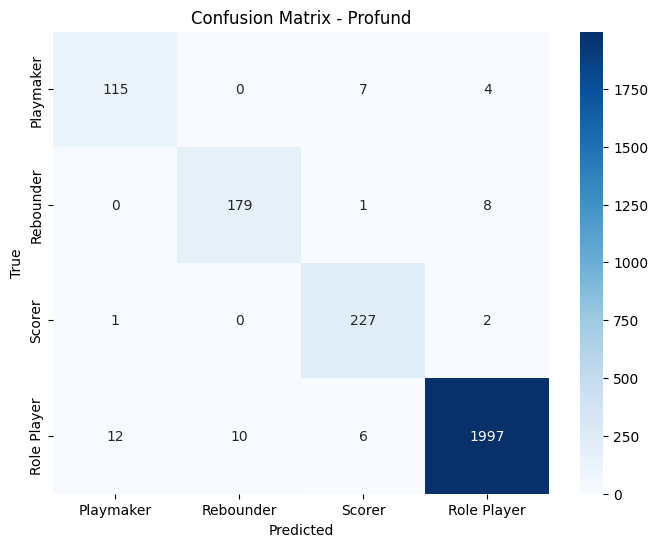

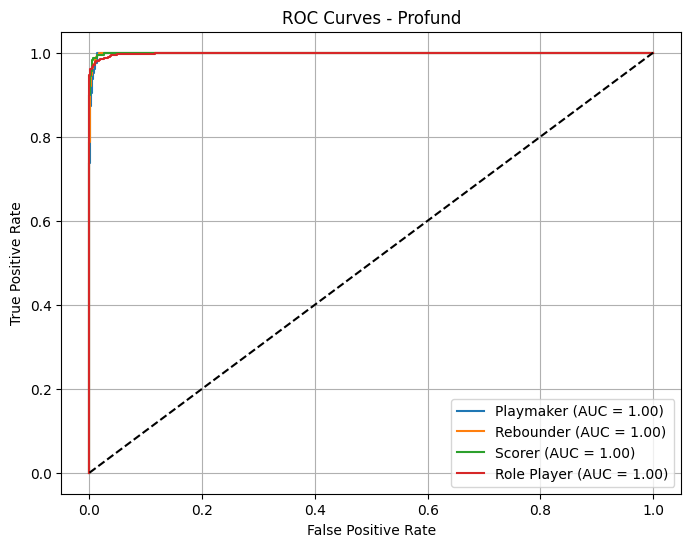

In [265]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def avaluar_model(model, dataloader, title="Model"):
    model.eval()
    y_true = []
    y_pred = []
    y_scores = []

    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            outputs = model(x_batch)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            y_true.extend(y_batch.numpy())
            y_pred.extend(preds.numpy())
            y_scores.extend(probs.numpy())

    all_labels = [0, 1, 2, 3]  # All possible classes
    unique_labels = np.unique(y_true)
    
    # Basic metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted', labels=all_labels, zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Playmaker', 'Rebounder', 'Scorer', 'Role Player'],
                yticklabels=['Playmaker', 'Rebounder', 'Scorer', 'Role Player'])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Only calculate ROC if we have at least 2 classes
    if len(unique_labels) > 1:
        y_true_bin = label_binarize(y_true, classes=all_labels)
        try:
            auc_score = roc_auc_score(y_true_bin, y_scores, multi_class='ovr')
            
            # Plot ROC curves for each class
            plt.figure(figsize=(8, 6))
            for i, label in enumerate(['Playmaker', 'Rebounder', 'Scorer', 'Role Player']):
                if i in unique_labels:  # Only plot for present classes
                    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_scores)[:, i])
                    roc_auc = roc_auc_score(y_true_bin[:, i], np.array(y_scores)[:, i])
                    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
            
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"ROC Curves - {title}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend(loc="lower right")
            plt.grid()
            plt.show()
        except ValueError as e:
            print(f"Could not compute ROC AUC: {str(e)}")
            auc_score = float('nan')
    else:
        print(f"Warning: Only class {unique_labels[0]} present - cannot compute ROC AUC")
        auc_score = float('nan')

    
    
    return acc, f1, auc_score
       


model_basic = MLPBasic(input_size)
model_deep = MLPDeep(input_size)

# Entrenament
entrenar_model(model_basic, train_loader, test_loader, epochs=20)
entrenar_model(model_deep, train_loader, test_loader, epochs=20)

# Avaluació
print("🔹 Model BÀSIC")
acc1, f1_1, auc1 = avaluar_model(model_basic, test_loader, "Bàsic")

print("🔹 Model PROFUND")
acc2, f1_2, auc2 = avaluar_model(model_deep, test_loader, "Profund")

JUSTIFICACIÓ ROC Accuracy F1-Score

# EXERCICI 3: 


🔧 Entrenant: Adam/CrossEntropy



🔧 Entrenant: Adam/nllLoss

🔧 Entrenant: SGD/CrossEntropy

🔧 Entrenant: SGD/nllLoss


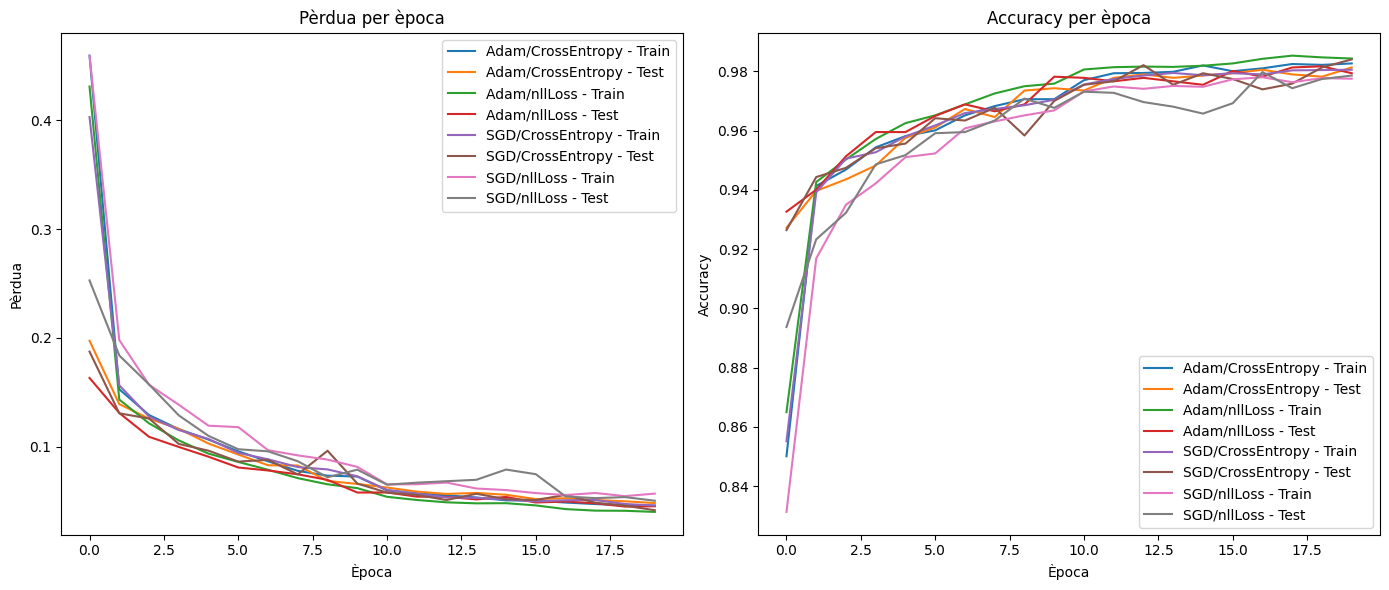

In [266]:
def entrenar_multiples_models(model, train_loader, test_loader, optimizer='Adam', loss_name='CrossEntropy', epochs=20, early_stopping=None):

    if loss_name == 'CrossEntropy':
        criteri = nn.CrossEntropyLoss()
    elif loss_name == 'nllLoss':
        criteri = nn.NLLLoss()
    else:
        criteri = nn.CrossEntropyLoss()  # Default to CrossEntropy if not specified
    
    if optimizer == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    info = {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': []}
    scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
    

    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)

            if loss_name == 'nllLoss':
                output = torch.log_softmax(output, dim=1)

            loss = criteri(output, batch_y.long())
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(output, dim=1)
            correct += (preds == batch_y).sum().item()
            total += batch_y.size(0)

        scheduler.step()

        train_loss = total_loss / len(train_loader)
        train_acc = correct / total

        model.eval()
        with torch.no_grad():
            test_loss, correct_test, total_test = 0, 0, 0
            for x_batch, y_batch in test_loader:
                outputs = model(x_batch)
                if loss_name == 'nllLoss':
                    outputs = torch.log_softmax(outputs, dim=1)
                loss = criteri(outputs, y_batch)
                test_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                correct_test += (preds == y_batch).sum().item()
                total_test += y_batch.size(0)

        test_loss /= len(test_loader)
        test_acc = correct_test / total_test

        info['train_loss'].append(train_loss)
        info['test_loss'].append(test_loss)
        info['train_acc'].append(train_acc)
        info['test_acc'].append(test_acc)

        if early_stopping:
            early_stopping(test_loss)
            if early_stopping.early_stop:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return info

def plot_training_info(info, labels):
    plt.figure(figsize=(14, 6))
    plt.subplot(1,2,1)
    for h, label in zip(info, labels):
        plt.plot(h['train_loss'], label=f'{label} - Train')
        plt.plot(h['test_loss'], label=f'{label} - Test')
    plt.title('Pèrdua per època')
    plt.xlabel('Època')
    plt.ylabel('Pèrdua')
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    for h, label in zip(info, labels):
        plt.plot(h['train_acc'], label=f'{label} - Train')
        plt.plot(h['test_acc'], label=f'{label} - Test')
    plt.title('Accuracy per època')
    plt.xlabel('Època')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

input_size = X_train.shape[1]

models = {
    "Adam/CrossEntropy": MLPDeep(input_size),
    "Adam/nllLoss": MLPDeep(input_size),
    "SGD/CrossEntropy": MLPDeep(input_size),
    "SGD/nllLoss": MLPDeep(input_size)
}
infos = []

for name, model in models.items():
    opt, loss = name.split('/')
    print(f"\n🔧 Entrenant: {name}")
    info = entrenar_multiples_models(model, train_loader, test_loader, optimizer=opt, loss_name='cross_entropy' if loss == 'CrossEntropy' else 'nllLoss', epochs=20)
    infos.append(info)

# Gràfica comparativa
plot_training_info(infos, list(models.keys()))

# EXERCICI 4: EVITAR OVERFITTING


🔧 Entrenant: Original

🔧 Entrenant: Només Dropout

🔧 Entrenant: Només Early Stopping

🔧 Entrenant: Dropout + Early Stopping
Early stopping at epoch 41


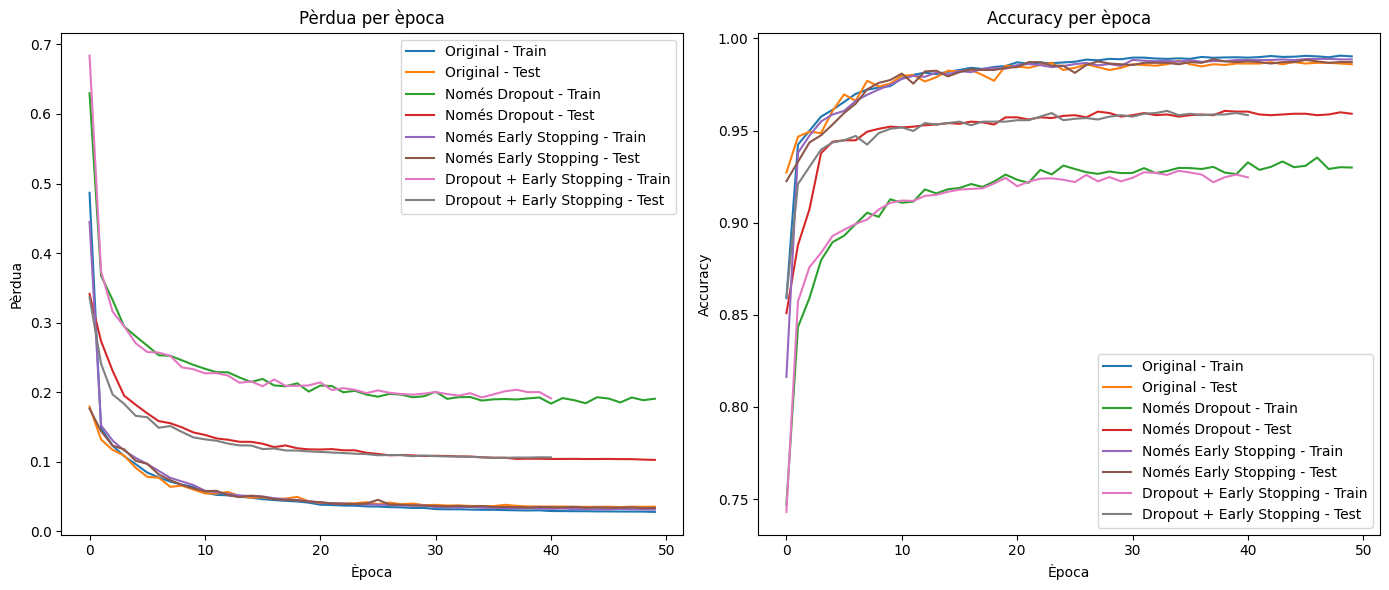

In [267]:
class MLPDeepWithDropout(nn.Module):
    def __init__(self, input_size):
        super(MLPDeepWithDropout, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout layer with 50% dropout rate
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),  # Another dropout layer
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.5),  # Final dropout layer
            nn.Linear(16, 4),
        )

    def forward(self, x):
        return self.model(x)
    
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

input_size = X_train.shape[1]

# Creem els models
models = {
    "Original": MLPDeep(input_size),
    "Només Dropout": MLPDeepWithDropout(input_size),
    "Només Early Stopping": MLPDeep(input_size),
    "Dropout + Early Stopping": MLPDeepWithDropout(input_size)
}

infos = []

# Entrenem els models
for name, model in models.items():
    print(f"\n🔧 Entrenant: {name}")
    if "Early Stopping" in name:
        info = entrenar_multiples_models(model, train_loader, test_loader, epochs=50, early_stopping=EarlyStopping(patience=5))
    else:
        info = entrenar_multiples_models(model, train_loader, test_loader, epochs=50)
    infos.append(info)

# Gràfica comparativa
plot_training_info(infos, list(models.keys()))

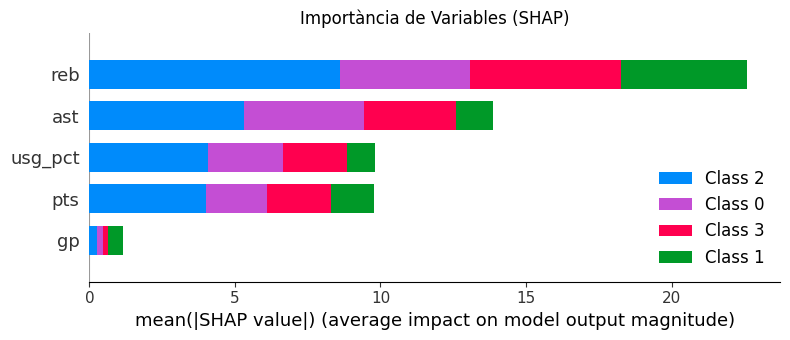

In [276]:
import shap
import numpy as np
import torch

# 1. Verificar dades
assert not np.isnan(X_train).any(), "Hi ha valors NaN a X_train"
assert not np.isinf(X_train).any(), "Hi ha valors infinits a X_train"

# 2. Preparar dades
background = torch.tensor(X_train[np.random.choice(X_train.shape[0], 100)]).float()
test_samples = torch.tensor(X_test[:50]).float()

# 3. SHAP
model.eval()
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(test_samples)

# 4. Visualització ampliada
plt.figure(figsize=(12, 8))
feature_names = ['pts', 'gp', 'reb', 'ast', 'usg_pct']
# Gràfic de barres per veure totes les variables
shap.summary_plot(shap_values, test_samples.numpy(), 
                 feature_names=feature_names,
                 plot_type="bar", show=False)

plt.title("Importància de Variables (SHAP)")
plt.tight_layout()
plt.show()

# Gràfic detallat per classe (si és classificació)
if isinstance(shap_values, list):
    for i, class_shap in enumerate(shap_values):
        plt.figure(figsize=(12, 6))
        shap.summary_plot(class_shap, test_samples.numpy(), 
                          feature_names=feature_names,
                          plot_type="dot")  # Per punts
        plt.title(f"Impacte de Variables per Classe {i}")
        plt.tight_layout()
        plt.show()

# Exercici 5 :SHAP interpretació dades
